# ImageDataGenerator
- 학습시 모델에 Image dataset을 제공하는 파이프라인 Generator
    - Image Augmentation(이미지증식)을 적용
    - 데이터를 모델에 배치단위로 제공
- 데이터 전체가 순환되어 배치 생성을 끝없이 함
    - https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
    - repaet...

## ImageDataGenerator()
- 매개변수: 이미지 증식(augmentation) 관련 설정을 정의
    - **fill_mode**: 이동이나 회전시 생기는 공간을 어떻게 채울 것인지 설정
        - nearest: 빈공간에 가장 가까운 pixel로 채우기 (1,2,3 [3],[3],[3])
        - reflect: 빈공간 근처 공간의 값을 거울로 반사되는 값들으로 채움. (1,2,3 [3],[2],[1])
        - constant: 지정한 값으로 채움. 기본은 0이고 특정값으로 채울때는 cval=100 으로 설정
    - Nomalization 설정
        - **rescale**: 지정한 값을 각 픽셀에 곱함 (rescale=1/255.)
        - **featurewise_center=True**: channel의 평균을 pixel에서 빼서 평균을 0으로 표준화 (channl 별로 처리)
        - **featurewise_std_nomalization=True**: channel 별로 표준화 (평균 0, 표준편차 1)
    - 반전
         - **horizontal_flip=True**: 좌우반전, **vertical_flip=True**: 상하 반전
    - 회전(rotation)
         - **rotation_range**=정수:  -정수 ~ +정수 범위로 랜덤 회전 (rotation_rate=30 : -30 ~ +30도 사이에서 랜덤하게 회전)
    - 이동
         - **width_shift_range=실수**: 좌우이동, **height_shift_range=실수**: 상하 이동
         - 실수값: 이동범위지정.  0 ~ 1 이면 이미지 너비, 높이 기준 비율. 1이상이면 pixel.
    - Zoom 
         - **zoom_range**: 실수 또는 [lower, upper]
             - 실수: [1-실수값, 1+실수값]
             - 1미만이면 확대(zoom in), 1초과면 축소(zoom out)
    - shear(전단변환): 평행사변형 형태로 변환
        - **shear_range**: 실수 - 각도 지정
    - 명암 (brightness)
        - **brightness_range** : 실수값 2개를 가지는 튜플이나 리스트. 명암 범위
        - 1이 원본. 0에 가까우면 어둡고 1보타 크면 밝아진다. 
          
- flow 메소드들
    - ImageDataGenerator에 Image Data를 batch 단위로 공급하는 Iterator 생성

## ImageDataGenerator에 dataset을 제공하는 메소드

- ### flow_from_directory () 
    - 학습시 파일 경로에 저장된 디렉토리로 부터 이미지를 읽어와 변형 처리 후 모델(네트워크)에 제공하는 Iterator 생성.
    - 주요 매개변수
        - directory: 이미지 저장 경로 (이미지는 지정한 디렉토리내에 클래스 별로 디렉토리가 나눠져 저장되 있어야 한다. 오름차순으로 Label이 생성.),
        - target_size: 이미지 크기. 지정한 크기로 resize한다. 기본값: (256,256)
        - color_mode: "grayscale", "rgb", "rgba" 중에 하나를 지정. 기본값: "rgb"
        - class_mode: 분류 종류 지정
            - 'binary' : binary class 분류
            - 'category' : multi class 분류. label(output)이 one hot encoding 된 경우 지정
            - 'sparse' : multi class 분류. label(output)이 label encoding 형식인 경우 지정
            - None: 기본값. 하위디렉토리로 추론
        - batch_size: 미니배치 사이즈 지정 (기본 : 32)
    - 반환값
        - DirectoryIterator: batch size만큼 image와 label을 제공하는 Generator
    - 지정한 directory의 구조
    
    ![flow_from_directory().png](figures/flow_from_directory().png)
    
    - 디렉토리 별로 class를 지정한다.
    - class 조회: `DirectoryIterator객체.class_indices.keys()`

- ### flow_from_dataframe()
    - 읽어올 파일의 경로와 label을 DataFrame으로 생성한 뒤 그것을 이용해 파일을 Loading한다.
    - dataframe
        - DataFrame: image 데이터의 절대경로와 label을 저장한 DataFrame객체
        - x_col: image경로 컬럼명
        - y_col: label 컬럼명
        - target_size: 이미지 크기. 지정한 크기로 resize한다. 기본값: (256,256)
        - color_mode: "grayscale", "rgb", "rgba" 중에 하나를 지정. 기본값: "rgb"
        - class_mode: 분류 종류 지정
            - 'binary' : binary class 분류
            - 'category' : multi class 분류. label(output)이 one hot encoding 된 경우 지정
            - 'sparse' : multi class 분류. label(output)이 label encoding 형식인 경우 지정
            - None: 기본값. 하위디렉토리로 추론
        - batch_size: 미니배치 사이즈 지정 (기본 : 32)
            - 한번에 몇개씩 데이터를 제공해줄  것인지
- ### flow()
    - ndarray 타입의 이미지를 받아서 처리. 
    - 주요 매개변수
        - x: input data. 4차원 배열(크기, height, width, channel)
        - y: labels. 
        - batch_size: 미니 배치 크기(기본값:32)
- ### 모델(네트워크)에서 fit() 호출하기 전까지는 preprocessing과 Data Loading이 실행되지 않는다.

![flow.png](figures/flow.png) 

In [1]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from IPython.display import Image

# load_img() : 이미지를 읽어오는 함수
# img_to_array() : Pillow -> 'numpy.ndarray'
import matplotlib.pyplot as plt
import numpy as np

<class 'PIL.PngImagePlugin.PngImageFile'>


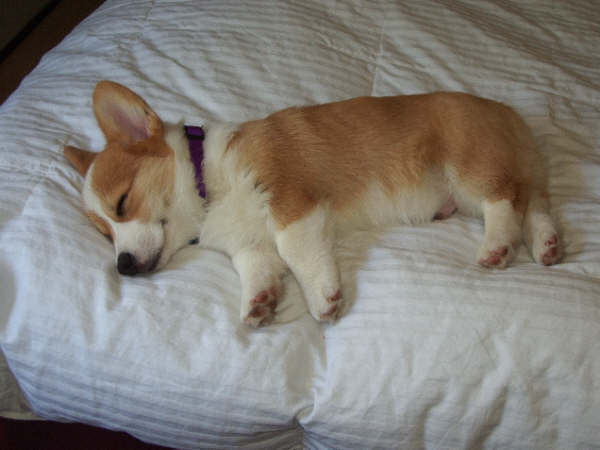

In [ ]:
img = load_img('image.jpg')
print(type(img))
img

In [ ]:
img_array = img_to_array(img)
print(type(img_array))
img_array = img_array[np.newaxis, ...]
img_array.shape

<class 'numpy.ndarray'>


(1, 450, 600, 3)

(1, 450, 600, 3)
(1, 450, 600, 3)
(1, 450, 600, 3)
(1, 450, 600, 3)
(1, 450, 600, 3)
(1, 450, 600, 3)
(1, 450, 600, 3)
(1, 450, 600, 3)
(1, 450, 600, 3)


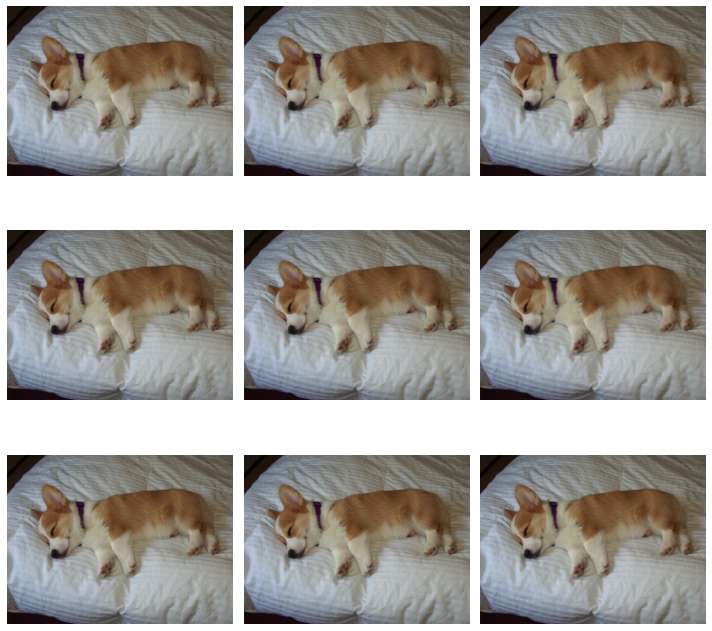

In [ ]:
# ImageDataGenerator 사용
# ImageDataGenerator 객체를 생성하면서 어떻게 (Augumentation - 변환) 이미지를 제공할지 설정
# ImageDataGenerator객체.flow_xxxx() : 변환/모델 네트워크에 제공할 이미지를 등록

datagen = ImageDataGenerator()

iterator = datagen.flow(img_array, batch_size=1)
# (모델에 제공할 이미지 - shpae(데이터개수,h, w, c), batch 크기)
# print(type(iterator))


# next(iterator) # 무한하게 제공

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch = next(iterator)
    print(batch.shape)
    plt.imshow(batch[0].astype(np.uint8))
    plt.axis('off')
    
plt.tight_layout()
plt.show()
# 똑같은 사진 나옴

(1, 450, 600, 3)
(1, 450, 600, 3)
(1, 450, 600, 3)
(1, 450, 600, 3)
(1, 450, 600, 3)
(1, 450, 600, 3)
(1, 450, 600, 3)
(1, 450, 600, 3)
(1, 450, 600, 3)


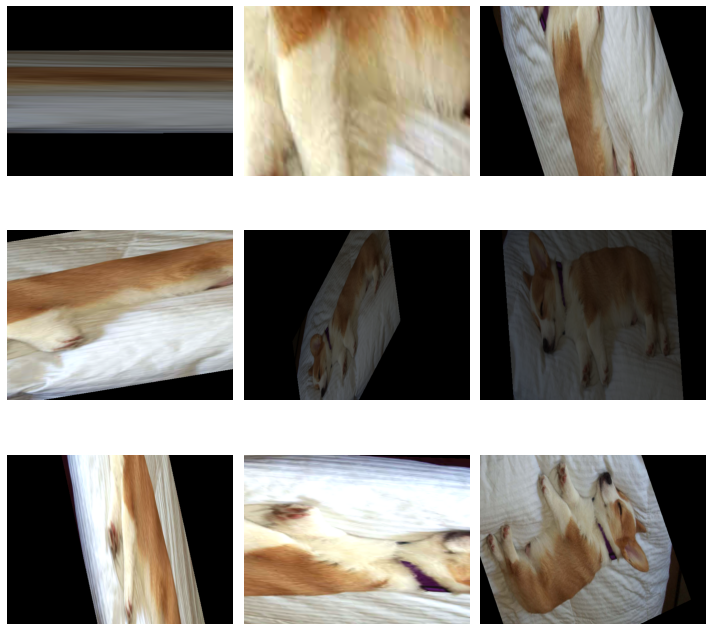

In [ ]:
datagen = ImageDataGenerator(
#             rescale = 1/255.0, # 지저한 값을 image 뒤에 곱한 뒤에 제공
            width_shift_range = 100, # 사진을 좌우로 움직임. 이동 범위 pixel을 지정(0~100 사이에서 랜덤하게 이동)
            fill_mode = "constant",
            height_shift_range = 50, # 상하로 이동
            shear_range = 40, # 평행사변형 형태로 이동 - 0~40
            rotation_range = 40, # 회전변환 (좌우 회전각도 범위)
            zoom_range = [-3, 2], # zoom(확대, 축소)
            brightness_range=[0.3, 1.3], # 밝기(명암) 범위, [가장 어두운, 가장 밝은], 1 : 원본, 0에 가까우면 어둡고 1보다 크면 밝음
            horizontal_flip = True, # 좌우반전
            vertical_flip = True # 상하반전
)

iterator = datagen.flow(img_array, batch_size=1)

# next(iterator) - 무한하게 제공

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch = next(iterator)
    print(batch.shape)
    plt.imshow(batch[0].astype(np.uint8))
    plt.axis('off')

plt.tight_layout()
plt.show()


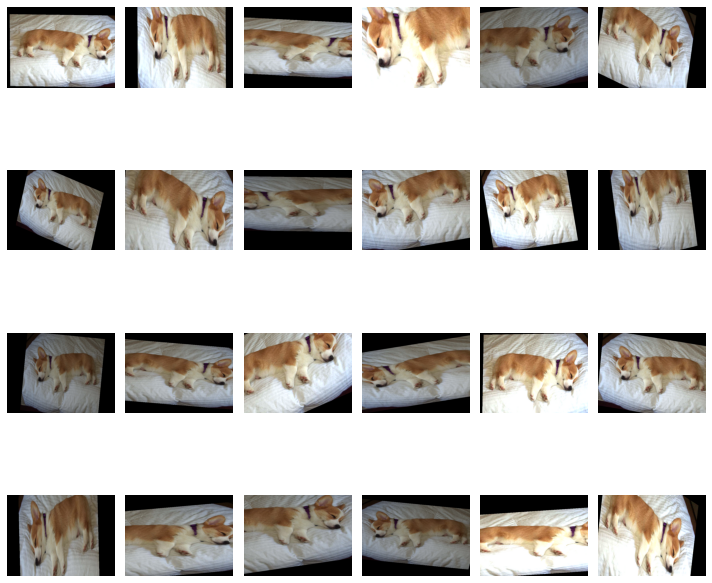

In [ ]:
datagen = ImageDataGenerator(
            fill_mode = "constant",
            width_shift_range = 50,
            height_shift_range = 50,
            shear_range =10,
            rotation_range = 20,
            zoom_range=0.5, #[1-0.5, 1+0.5],
            brightness_range=[0.5, 1.5],
            horizontal_flip=True
)

iterator = datagen.flow(img_array, batch_size=1)

plt.figure(figsize=(10, 10))
for i in range(24):
    plt.subplot(4, 6, i+1)
    batch = next(iterator)
    plt.imshow(batch[0].astype(np.uint8))
    plt.axis('off')
    
plt.tight_layout()
plt.show()

# CNN   small datasets 학습
- Data의 수가 많지 않을 때 CNN을 통한 모형 학습이 어려울 수 있음
  - 딥러닝은 많은 수의 데이터를 통해 feature engineering 과정 없이 feature를 찾음 
- Data가 많지 않아 CNN 학습에 어려움이 있을 때 사용 가능한 방법
    - Data augmentation 활용
        - 이미지의 색깔, 각도 등을 약간씩 변형하여 data의 수를 늘림 
    - Pre-trained network의 활용
        - 매우 큰 데이터셋으로 미리 Training한 모델의 파라미터(가중치)를 가져와서 풀려는 문제에 맞게 모델을 재보정해서 사용하는 것.
        - 미리 다양한 데이터를 가지고 학습된 모델을 사용하므로 적은 데이터에도 좋은 성능을 만듦

# Data for cats vs. dogs
- 2013년 Kaggle의 computer vision competition data 활용 https://www.kaggle.com/c/dogs-vs-cats/data
- 개와 고양이를 구분하기 위한 문제로 각 12,500개의 이미지를 포함
- Medium-resolution color JPEGs
- 25000장의 사진 중 4000장의 cats/dogs 사진(2000 cats, 2000 dogs) 만을 사용하여 학습하여 좋은 모형을 만들어 낼 수 있을까?
    - 학습: 2000, 검증: 1000, 테스트: 1000
    
![cats_vs_dogs_samples](https://s3.amazonaws.com/book.keras.io/img/ch5/cats_vs_dogs_samples.jpg)

In [1]:
# - gdown 패키지 : 구글 드라이브의 공유파일 다운로드 패키지    
# - `pip install gdown==3.3.1`
# - 코랩에는 설치 되어 있음.

In [2]:
# 이미지 다운로드
import gdown
url = 'https://drive.google.com/uc?id=1nBE3N2cXQGwD8JaD0JZ2LmFD-n3D5hVU'
fname = "cats_and_dogs_small.zip"

gdown.download(url, fname, quiet=False) # 구글 드라이브에 url로 공유된 파이릉ㄹ 다운로드. 다운로드 된 파일의 이름을 fname으로 저장


Downloading...
From: https://drive.google.com/uc?id=1nBE3N2cXQGwD8JaD0JZ2LmFD-n3D5hVU
To: /content/cats_and_dogs_small.zip
100%|██████████| 90.8M/90.8M [00:01<00:00, 89.2MB/s]


'cats_and_dogs_small.zip'

In [3]:
# 디렉토리 생성
! mkdir data
# 압축해제
!unzip -q cats_and_dogs_small.zip -d data

## 1. basic

In [4]:
# 하이퍼파라미터 설정
LEARNING_RATE = 0.001
N_EPOCHS = 100
N_BATCHS = 32

IMAGE_SIZE = 224

### ImageDataGenerator 생성

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [6]:
# 파일 경로 설정
train_dir = "/content/data/train"
valid_dir = "/content/data/validation/"
test_dir = "/content/data/test"

In [7]:
# ImageDataGenerator 생성
train_datagen = ImageDataGenerator(rescale=1/255.0)
valid_datagen = ImageDataGenerator(rescale=1/255.0)
test_datagen = ImageDataGenerator(rescale=1/255.0)


# raw data 연결
# 디렉토리 확인만 하는 개념
# 실제 데이터를 디스크에서 메모리로 읽지 않음
# iterateor로 부터 데이터를 요청할 때 디스크에서 읽음
train_iter = train_datagen.flow_from_directory(train_dir, # image 경로
                                               target_size = (IMAGE_SIZE, IMAGE_SIZE), # 이미지사이즈
                                               class_mode = "binary", # output 형태
                                               batch_size = N_BATCHS # 미니배치사이즈
                                               )
valid_iter = valid_datagen.flow_from_directory(valid_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               class_mode = "binary", batch_size=N_BATCHS)
test_iter = test_datagen.flow_from_directory(test_dir, target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                             class_mode="binary", batch_size = N_BATCHS)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
# LABEL 확인 - interator.class_indices

train_iter.class_indices

{'cats': 0, 'dogs': 1}

In [10]:
# 1 epoch 당 step 수 - len(iterator)
len(train_iter), len(valid_iter), len(test_iter)

(63, 32, 32)

In [13]:
# iterator를 이용해서 데이터 조회
batch = next(train_iter) # batch_size 개수만큼 조회
print(type(batch)) # <class 'tuple'>
# batch[0] -> image, batch[1] -> label
print(type(batch[0]), type(batch[1])) # <class 'numpy.ndarray'> <class 'numpy.ndarray'>
print(batch[0].shape, batch[1].shape) # (32, 224, 224, 3) (32,)

<class 'tuple'>
[1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 1.]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(32, 224, 224, 3) (32,)


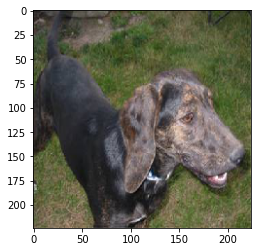

In [14]:
import matplotlib.pyplot as plt

plt.imshow(batch[0][0])
plt.show()

### network 형성

- Input: $224 \times 224$ 픽셀의 RGB layer 
- Output: cat or dog (binary classification) 
- ImageDataGenerator를 이용해 파일시스템에 저장된 이미지데이터셋을 학습

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

In [20]:
def create_model():
  model = keras.Sequential()

  model.add(layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
  model.add(layers.MaxPool2D(padding="same"))

  model.add(layers.Conv2D(filters=64, kernel_size=3, padding="same", activation = "relu"))
  model.add(layers.MaxPool2D(padding="same"))

  model.add(layers.Conv2D(filters=128, kernel_size=3, padding="same", activation='relu'))
  model.add(layers.MaxPool2D(padding='same'))

  model.add(layers.Conv2D(filters=128, kernel_size=3, padding="same", activation='relu'))
  model.add(layers.MaxPool2D(padding='same'))

  # Dense
  model.add(layers.Flatten())
  # dropout
  model.add(layers.Dropout(rate=0.5))
  model.add(layers.Dense(units=512, activation = "relu"))
  model.add(layers.Dense(units=1, activation = "sigmoid")) # 2진 분류 출력 레이어

  return model

In [34]:
model = create_model()

model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss = "binary_crossentropy",
              metrics = ['accuracy'])


In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)     

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##  Model Training(학습)

In [26]:
import os
save_dir = os.path.join("/content/drive/MyDrive/ColabNotebooks/", "cat_dog_model", "basic")
os.makedirs(save_dir, exist_ok=True)

save_file_path = os.path.join(save_dir, "weights_ckpt")

In [27]:
# callback 생성
# ModelCheckpoint - 모델을 저장해주는 callback
mc_callback = keras.callbacks.ModelCheckpoint(filepath = save_file_path,
                                              save_weights_only = True,
                                              save_best_only = True,
                                              monitor = "val_loss",
                                              verbose=2)

es_callback = keras.callbacks.EarlyStopping(monitor = "val_loss",
                                            patience = 10)

In [35]:
# train_dataset => ImageDataGenerator를 지정(iterator)
# steps_per_epoch => 1 epoch 당 몇 step인지 계산
# iterator는 무한으로 제공, 그래서 어디가 1epoch인지 모름

hist = model.fit(train_iter, epochs=N_EPOCHS, 
                 steps_per_epoch = len(train_iter),
                 validation_data = valid_iter, validation_steps = len(valid_iter),
                 callbacks=[mc_callback, es_callback])

Epoch 1/100
63/63 [==============================] - ETA: 0s - loss: 0.7202 - accuracy: 0.4935
Epoch 00001: val_loss did not improve from 0.58637
63/63 [==============================] - 10s 156ms/step - loss: 0.7202 - accuracy: 0.4935 - val_loss: 0.6930 - val_accuracy: 0.5360
Epoch 2/100
63/63 [==============================] - ETA: 0s - loss: 0.6938 - accuracy: 0.5055
Epoch 00002: val_loss did not improve from 0.58637
63/63 [==============================] - 10s 153ms/step - loss: 0.6938 - accuracy: 0.5055 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.5140
Epoch 00003: val_loss did not improve from 0.58637
63/63 [==============================] - 10s 151ms/step - loss: 0.6930 - accuracy: 0.5140 - val_loss: 0.6894 - val_accuracy: 0.5690
Epoch 4/100
63/63 [==============================] - ETA: 0s - loss: 0.6897 - accuracy: 0.5390
Epoch 00004: val_loss did not improve from 0.58637
63/63 [=============

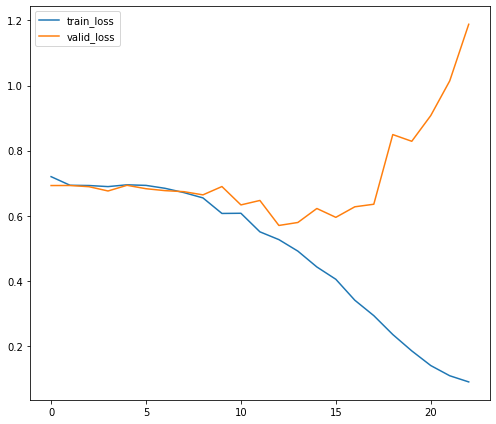

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))
plt.plot(hist.history['loss'], label="train_loss")
plt.plot(hist.history['val_loss'], label="valid_loss")
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
# 저장된 모델 학습 가중치 불러오기
save_model = create_model()
save_model.compile(optimizer=keras.optimizers.Adam(learning_rate = LEARNING_RATE),
                   loss = "binary_crossentropy",
                   metrics = ['accuracy'])

save_model.load_weights(save_file_path)

In [39]:
save_model.evaluate(test_iter)

32/32 [==============================] - 3s 92ms/step - loss: 0.5688 - accuracy: 0.7010


[0.5687699913978577, 0.7009999752044678]

### 새로운 데이터 추론

In [40]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_preprocessing_image(img_path):
  '''
  path 이미지를 읽어서 추론할 수 있도록 ndarray로 변환해서 반환하는 함수
  '''
  raw_img  = load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
  img_array = img_to_array(raw_img)
  img_array = img_array[np.newaxis, ...]

  return (img_array/255.0).astype(np.float32)

In [53]:
# 구글에서 찾아 저장한 개, 고양이 사진
dog = load_preprocessing_image('dog2.jpeg')
cat = load_preprocessing_image('cat.jpeg')

dog.shape, cat.shape

((1, 224, 224, 3), (1, 224, 224, 3))

In [54]:
pred1 = save_model.predict(dog)
pred2 = save_model.predict(cat)

In [55]:
result1 = np.where(pred1>0.5, 1, 0)[0]
result2 = np.where(pred2>0.5, 1, 0)[0]

In [56]:
train_iter.class_indices

{'cats': 0, 'dogs': 1}

In [57]:
print(result1, result2)

[1] [0]


## 2.data augmentation
- 학습 이미지의 수가 적어서 overfitting이 발생할 가능성을 줄이기 위해 기존 훈련 데이터로부터 그럴듯하게 이미지 변환을 통해서 이미지(데이터)를 늘리는 작업을 Image augmentation
- train_set에만 적용
- validation, test set에는 적용하지 않고 rescaling만 함

In [ ]:
# ImageDataGenerator에 Image Augumentation 기능을 추가해서 생성

In [59]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, img_to_array,ImageDataGenerator

np.random.seed(0)
tf.random.set_seed(0)

### 하이퍼파라미터

In [60]:
# 하이퍼파라미터
LEARNING_RATE = 0.001
N_EPOCHS = 100
N_BATCHS = 80
# 이미지 사이즈
IMAGE_SIZE=224 

### 경로 설정

In [61]:
train_dir = "/content/data/train"
valid_dir = "/content/data/validation"
test_dir = "/content/data/test"

### 2.1. ImageDataGenerator 생성 (디렉토리로 부터 읽어오는 경우)

In [64]:
# train data에만 Image Augumentation
# valid, test에는 적용 안함

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range = 0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode = "constant"
                                   )

valid_datagen = ImageDataGenerator(rescale=1/255.0)
test_datagen = ImageDataGenerator(rescale=1/255.0)

In [65]:
train_iter = train_datagen.flow_from_directory(train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               class_mode = "binary", batch_size = N_BATCHS)
valid_iter = valid_datagen.flow_from_directory(valid_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               class_mode = "binary", batch_size = N_BATCHS)
test_iter = test_datagen.flow_from_directory(test_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                              class_mode="binary", batch_size = N_BATCHS)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### 모델 생성

In [66]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss = "binary_crossentropy",
              metrics = ['accuracy'])

In [67]:
save_dir = os.path.join("/content/drive/MyDrive/ColabNotebooks/cat_dog_model", "augumentation")
os.makedirs(save_dir, exist_ok = True)

save_file_path = os.path.join(save_dir, 'weights_ckpt')

mc_callback = keras.callbacks.ModelCheckpoint(filepath=save_file_path,
                                              save_weights_only=True,
                                              save_best_only= True,
                                              monitor = "val_loss",
                                              verbose =2)

es_callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience = 10,
                                            verbose=2)

In [68]:
hist = model.fit(train_iter, epochs=N_EPOCHS, steps_per_epoch=len(train_iter),
                 validation_data = valid_iter, validation_steps=len(valid_iter),
                  callbacks= [mc_callback, es_callback])

Epoch 1/100
25/25 [==============================] - ETA: 0s - loss: 0.7327 - accuracy: 0.4710
Epoch 00001: val_loss improved from inf to 0.69270, saving model to /content/drive/MyDrive/ColabNotebooks/cat_dog_model/augumentation/weights_ckpt
25/25 [==============================] - 26s 993ms/step - loss: 0.7327 - accuracy: 0.4710 - val_loss: 0.6927 - val_accuracy: 0.5090
Epoch 2/100
25/25 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.5050
Epoch 00002: val_loss did not improve from 0.69270
25/25 [==============================] - 24s 971ms/step - loss: 0.6930 - accuracy: 0.5050 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - ETA: 0s - loss: 0.6921 - accuracy: 0.5235
Epoch 00003: val_loss did not improve from 0.69270
25/25 [==============================] - 24s 956ms/step - loss: 0.6921 - accuracy: 0.5235 - val_loss: 0.6929 - val_accuracy: 0.5550
Epoch 4/100
25/25 [==============================] - ETA: 0s - loss: 0

In [70]:
save_model_aug = create_model()
save_model_aug.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                      loss="binary_crossentropy",
                      metrics=['accuracy'])

# 저장된 weights 불러오기

save_file_path = "/content/drive/MyDrive/ColabNotebooks/cat_dog_model/augumentation/weights_ckpt"
save_model_aug.load_weights(save_file_path)

save_model_aug.evaluate(test_iter)

13/13 [==============================] - 3s 214ms/step - loss: 0.4623 - accuracy: 0.7840


[0.4622570872306824, 0.7839999794960022]

In [72]:
dog2 = load_preprocessing_image('dog2.jpeg')
cat2 = load_preprocessing_image('cat.jpeg')

pred3 = save_model_aug.predict(dog2)
pred4 = save_model_aug.predict(cat2)

result3 = np.where(pred3 > 0.5, 1, 0)[0]
result4 = np.where(pred4 > 0.5, 1, 0)[0]
print(result3, result4)

[1] [0]


## 3. DataFrame


In [73]:
import gdown

url = 'https://drive.google.com/uc?id=17ejPJw42TgTv0jCPMMlVTHwF57XYE2kb'
fname = 'cats_and_dogs_small_union.zip'

gdown.download(url, fname, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=17ejPJw42TgTv0jCPMMlVTHwF57XYE2kb
To: /content/cats_and_dogs_small_union.zip
100%|██████████| 90.7M/90.7M [00:01<00:00, 71.3MB/s]


'cats_and_dogs_small_union.zip'

In [74]:
!mkdir data/union
!unzip -q cats_and_dogs_small_union.zip -d data/union

In [82]:
# glob - 파일 경로를 (문자열) 조회 라이브러리
from glob import glob
# ** 모든 하위 디렉토리, * : 모든것.
# glob("/content/data/union/cats/*") # 디렉토리 아래있는 모든 파일, 디렉토리들의 경로를반환
# glob("/content/data/union/cats/*.jpg") # jpg 파일들의 경로만 반환
# glob("/content/data/union/cats/a*.jpg") # a로 시작하고 확장자가 jpg인  파일들의 경로만 반환


# 파일명에서 라벨만 추출
path_list = glob('/content/data/union/**/*.jpg')

label_list = []

for path in path_list:
  label = os.path.basename(path).split('.')[0] # cat or dog
  label_list.append(label)

label_list2 = [os.path.basename(path).split('.')[0] for path in path_list]

### dataframe 만들기

In [83]:
import pandas as pd

d = {
    'path' : path_list,
     'label' : label_list
}

df = pd.DataFrame(d)
df.shape

# 파일로 저장
df.to_csv('cat_dog_path.csv', index=False)

### 데이터 나누기

In [96]:
# train/test/validation으로 나누기.

cat_df = df[df['label']=="cat"]
dog_df = df[df['label']=="dog"]

# train/test = 8.:2 (1600 : 400)

idx = 1600
cat_df.iloc[:idx]
dog_df.iloc[:idx]

# 밑으로 데이터 붙일 때는 concat
train_df = pd.concat([cat_df.iloc[:idx], dog_df.iloc[:idx]], axis=0)
test_df = pd.concat([cat_df.iloc[idx:], dog_df.iloc[idx:]], axis=0)

### ImageDataGenerator 생성

In [99]:
train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   brightness_range=[0.7, 1.3],
                                   fill_mode = "constant"
                                   )

valid_datagen = ImageDataGenerator(rescale=1/255.0)

In [100]:
train_iter = train_datagen.flow_from_dataframe(train_df, # 경로와 라벨을 가진 dataframe
                                               x_col = "path", # 경로 컬럼명
                                               y_col = "label", # 라벨 컬럼명
                                               class_mode = "binary",
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               batch_size = N_BATCHS
                                               )

valid_iter = valid_datagen.flow_from_dataframe(test_df,
                                               x_col = "path",
                                               y_col = "label",
                                               class_mode = "binary",
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               batch_size = N_BATCHS)

Found 3200 validated image filenames belonging to 2 classes.
Found 800 validated image filenames belonging to 2 classes.


### 모델 학습

In [103]:
LEARNING_RATE = 0.001
N_EPOCHS = 100
N_BATCHS = 80

IMAGE_SIZE = 224

model = create_model()
model.compile(optimizer = keras.optimizers.Adam(learning_rate = LEARNING_RATE),
              loss = 'binary_crossentropy', metrics= ['accuracy'])

In [104]:
save_dir = os.path.join("/content/drive/MyDrive/ColabNotebooks/cat_dog_model", "dataframe")
os.makedirs(save_dir, exist_ok = True)

save_file_path = os.path.join(save_dir, 'weights_ckpt')

mc_callback = keras.callbacks.ModelCheckpoint(filepath=save_file_path,
                                              save_weights_only=True,
                                              save_best_only= True,
                                              monitor = "val_loss",
                                              verbose =2)

es_callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience = 10,
                                            verbose=2)

In [105]:
hist = model.fit(train_iter, epochs=N_EPOCHS, steps_per_epoch=len(train_iter),
                 validation_data =valid_iter, validation_steps = len(valid_iter),
                 callbacks= [mc_callback, es_callback])

Epoch 1/100
40/40 [==============================] - ETA: 0s - loss: 0.7772 - accuracy: 0.5022
Epoch 00001: val_loss improved from inf to 0.69301, saving model to /content/drive/MyDrive/ColabNotebooks/cat_dog_model/dataframe/weights_ckpt
40/40 [==============================] - 43s 1s/step - loss: 0.7772 - accuracy: 0.5022 - val_loss: 0.6930 - val_accuracy: 0.4988
Epoch 2/100
40/40 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5025
Epoch 00002: val_loss did not improve from 0.69301
40/40 [==============================] - 42s 1s/step - loss: 0.6933 - accuracy: 0.5025 - val_loss: 0.6931 - val_accuracy: 0.5487
Epoch 3/100
40/40 [==============================] - ETA: 0s - loss: 0.6935 - accuracy: 0.5059
Epoch 00003: val_loss did not improve from 0.69301
40/40 [==============================] - 42s 1s/step - loss: 0.6935 - accuracy: 0.5059 - val_loss: 0.6931 - val_accuracy: 0.5625
Epoch 4/100
40/40 [==============================] - ETA: 0s - loss: 0.6931 - accur

In [107]:
save_model_df = create_model()
save_model_df.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                      loss="binary_crossentropy",
                      metrics=['accuracy'])

# 저장된 weights 불러오기

save_file_path = "/content/drive/MyDrive/ColabNotebooks/cat_dog_model/dataframe/weights_ckpt"
save_model_df.load_weights(save_file_path)


In [108]:
dog3 = load_preprocessing_image('dog2.jpeg')
cat3 = load_preprocessing_image('cat.jpeg')

pred5 = save_model_df.predict(dog2)
pred6 = save_model_df.predict(cat2)

result5 = np.where(pred5 > 0.5, 1, 0)[0]
result6 = np.where(pred6 > 0.5, 1, 0)[0]
print(result5, result6)

[1] [0]
